In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
train = pd.read_csv("D:\\Mars Rover Manipal\\Project 4\\fashion-mnist_train.csv")
test = pd.read_csv("D:\\Mars Rover Manipal\\Project 4\\fashion-mnist_test.csv")

In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 359.3 MB


In [47]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 59.9 MB


In [48]:
pd.crosstab(train['label'], train['label'])

label,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,6000,0,0,0,0,0,0,0,0,0
1,0,6000,0,0,0,0,0,0,0,0
2,0,0,6000,0,0,0,0,0,0,0
3,0,0,0,6000,0,0,0,0,0,0
4,0,0,0,0,6000,0,0,0,0,0
5,0,0,0,0,0,6000,0,0,0,0
6,0,0,0,0,0,0,6000,0,0,0
7,0,0,0,0,0,0,0,6000,0,0
8,0,0,0,0,0,0,0,0,6000,0


In [49]:
records=pd.DataFrame(test['label'])
records

,label
0,0
1,1
2,2
3,2
4,3
...,...
9995,0
9996,6
9997,8
9998,8


In [50]:
train, val = train_test_split(train, test_size=0.10, random_state=42)

In [51]:
train=np.array(train)
test=np.array(test)
val=np.array(val)

In [52]:
print(train.shape)
m,n = train.shape

data_train = train[0:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape
X_train.shape

(54000, 785)


(784, 54000)

In [53]:
print(test.shape)
m,n = test.shape

data_test = test[0:m].T
Y_test = data_test[0]
X_test = data_test[1:n]
X_test = X_test / 255.
_,m_test = X_test.shape
X_test.shape

(10000, 785)


(784, 10000)

In [54]:
print(val.shape)
m,n = val.shape

data_val = val[0:m].T
Y_val = data_val[0]
X_val = data_val[1:n]
X_val = X_val / 255.
_,m_val = X_val.shape
X_val.shape

(6000, 785)


(784, 6000)

In [55]:
def print_image(index):
    current_image = X_train[:, index, None]
    label = Y_train[index]
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Label:  0


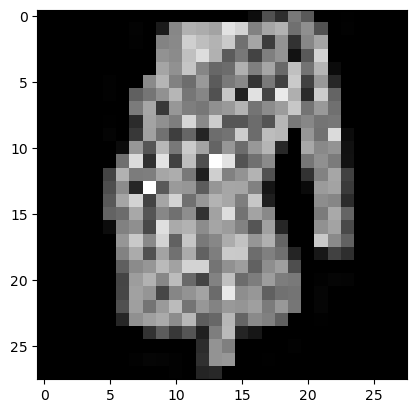

In [88]:
print_image(12)

Label:  1


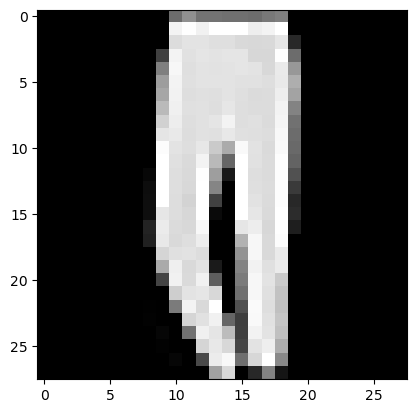

In [56]:
print_image(2546)

Label:  2


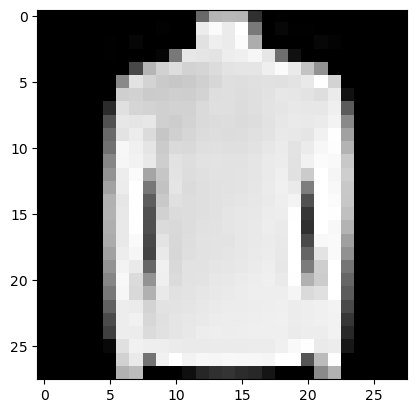

In [57]:
print_image(502)

Label:  3


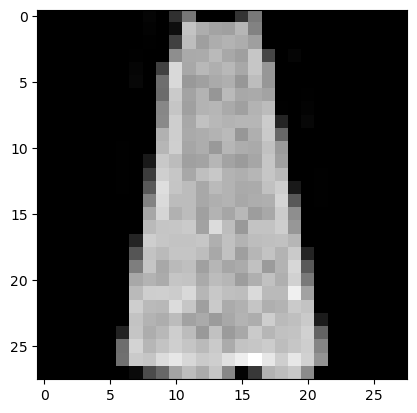

In [85]:
print_image(224)

Label:  4


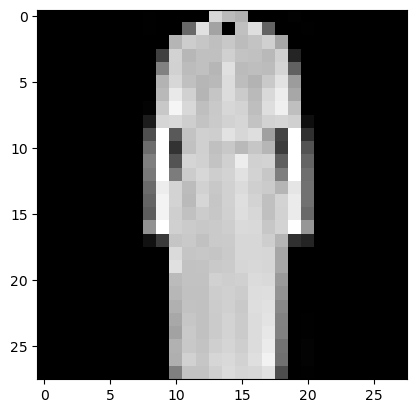

In [89]:
print_image(2)

Label:  5


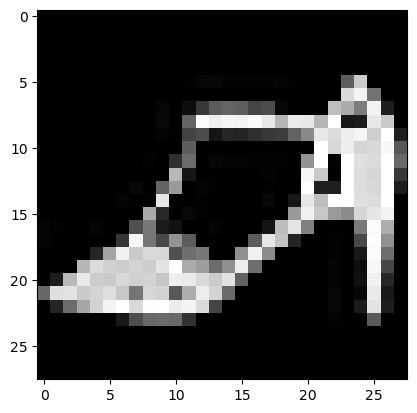

In [62]:
print_image(23)

Label:  6


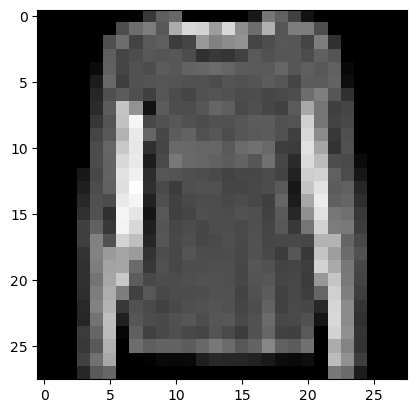

In [64]:
print_image(1234)

Label:  7


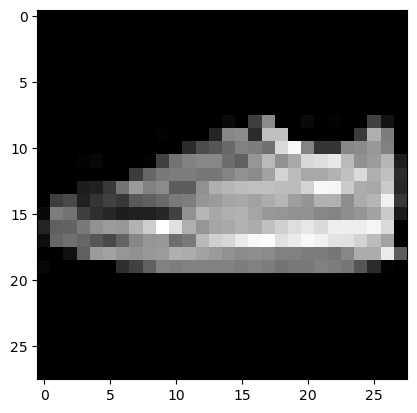

In [125]:
print_image(33635)

Label:  8


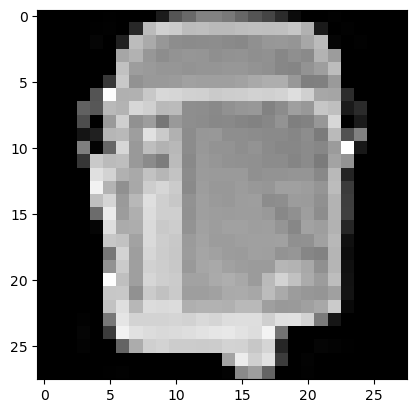

In [93]:
print_image(7)

Label:  9


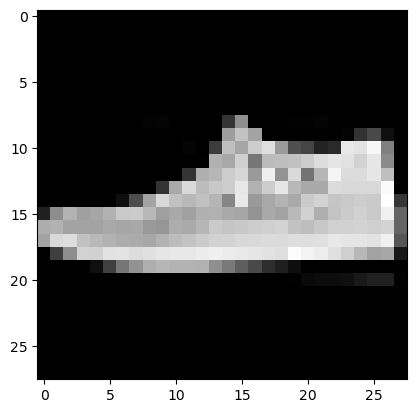

In [61]:
print_image(0)

In [66]:
def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

In [67]:
def init_params():
    W1 = np.random.rand(128, 784) - 0.5
    b1 = np.random.rand(128, 1) - 0.5
    W2 = np.random.rand(10, 128) - 0.5
    b2 = np.random.rand(10, 1) - 0.5
    return W1, b1, W2, b2

In [68]:
def ReLU(Z):
    return np.maximum(Z, 0)

def ReLU_deriv(Z):
    return Z > 0

def softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [69]:
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1  
    W2 = W2 - alpha * dW2
    b2 = b2 - alpha * db2 
    
    return W1, b1, W2, b2

def computeloss(Y,A2):
    m=10
    y=one_hot(Y)
    loss=(1/m)*(-np.sum(y*np.log(A2+10**-8)))
    return loss

In [70]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    return np.sum(predictions == Y) / Y.size

def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def gradient_descent(X, Y, alpha, epochs):
    losses=[]
    W1, b1, W2, b2 = init_params()
    for i in range(epochs):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        losses.append(computeloss(Y,A2))
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        
        if i % 20 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print("Train Accuracy",get_accuracy(predictions, Y))
            val_predictions = make_predictions(X_val, W1, b1, W2, b2)
            print("Val Accuracy", get_accuracy(val_predictions, Y_val))
            print("_________________________")
    return W1, b1, W2, b2, losses

In [71]:
epoch = 301
W1, b1, W2, b2, loss = gradient_descent(X_train, Y_train, 0.01, epoch)

Iteration:  0
Train Accuracy 0.09014814814814814
Val Accuracy 0.15666666666666668
_________________________
Iteration:  20
Train Accuracy 0.6110925925925926
Val Accuracy 0.6316666666666667
_________________________
Iteration:  40
Train Accuracy 0.6761296296296296
Val Accuracy 0.6906666666666667
_________________________
Iteration:  60
Train Accuracy 0.7066666666666667
Val Accuracy 0.714
_________________________
Iteration:  80
Train Accuracy 0.7217407407407408
Val Accuracy 0.7308333333333333
_________________________
Iteration:  100
Train Accuracy 0.7321851851851852
Val Accuracy 0.7415
_________________________
Iteration:  120
Train Accuracy 0.7447777777777778
Val Accuracy 0.7486666666666667
_________________________
Iteration:  140
Train Accuracy 0.7525185185185185
Val Accuracy 0.758
_________________________
Iteration:  160
Train Accuracy 0.7592592592592593
Val Accuracy 0.762
_________________________
Iteration:  180
Train Accuracy 0.7645185185185185
Val Accuracy 0.7665
_____________

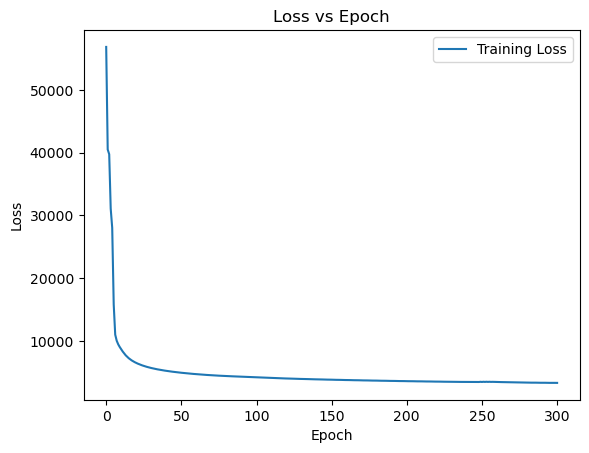

In [130]:
plt.plot(loss, label='Training Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [73]:
test_predictions = make_predictions(X_test, W1, b1, W2, b2)
print("Test Accuracy",get_accuracy(test_predictions, Y_test))

Test Accuracy 0.7826


In [74]:
records['predicted labels']=test_predictions
records

,label,predicted labels
0,0,0
1,1,1
2,2,2
3,2,2
4,3,4
...,...,...
9995,0,0
9996,6,6
9997,8,8
9998,8,8


In [75]:
cm=pd.crosstab(records['label'],records['predicted labels'])
cm

predicted labels,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,700,13,14,66,11,4,179,1,12,0
1,13,940,10,21,7,1,7,0,1,0
2,15,3,516,12,188,0,249,1,16,0
3,39,33,6,815,45,2,51,0,9,0
4,3,4,34,43,757,0,153,0,6,0
5,6,2,2,1,0,841,4,74,24,46
6,143,5,61,45,118,3,596,0,29,0
7,0,0,0,0,0,63,0,838,2,97
8,0,1,12,14,8,15,19,14,911,6


In [81]:
labels=np.array(records['label'])
predicted_labels=np.array(records['predicted labels'])

In [82]:
def confusion_mat(labels, predicted_labels, num_classes):
    confusion_matrix = np.zeros((num_classes, num_classes))

    for label, predicted_label in zip(labels, predicted_labels):
        confusion_matrix[label, predicted_label] += 1

    return confusion_matrix

con_mat = confusion_mat(labels, predicted_labels,10)
print(con_mat)

[[700.  13.  14.  66.  11.   4. 179.   1.  12.   0.]
 [ 13. 940.  10.  21.   7.   1.   7.   0.   1.   0.]
 [ 15.   3. 516.  12. 188.   0. 249.   1.  16.   0.]
 [ 39.  33.   6. 815.  45.   2.  51.   0.   9.   0.]
 [  3.   4.  34.  43. 757.   0. 153.   0.   6.   0.]
 [  6.   2.   2.   1.   0. 841.   4.  74.  24.  46.]
 [143.   5.  61.  45. 118.   3. 596.   0.  29.   0.]
 [  0.   0.   0.   0.   0.  63.   0. 838.   2.  97.]
 [  0.   1.  12.  14.   8.  15.  19.  14. 911.   6.]
 [  0.   0.   2.   0.   0.  24.   1.  57.   4. 912.]]


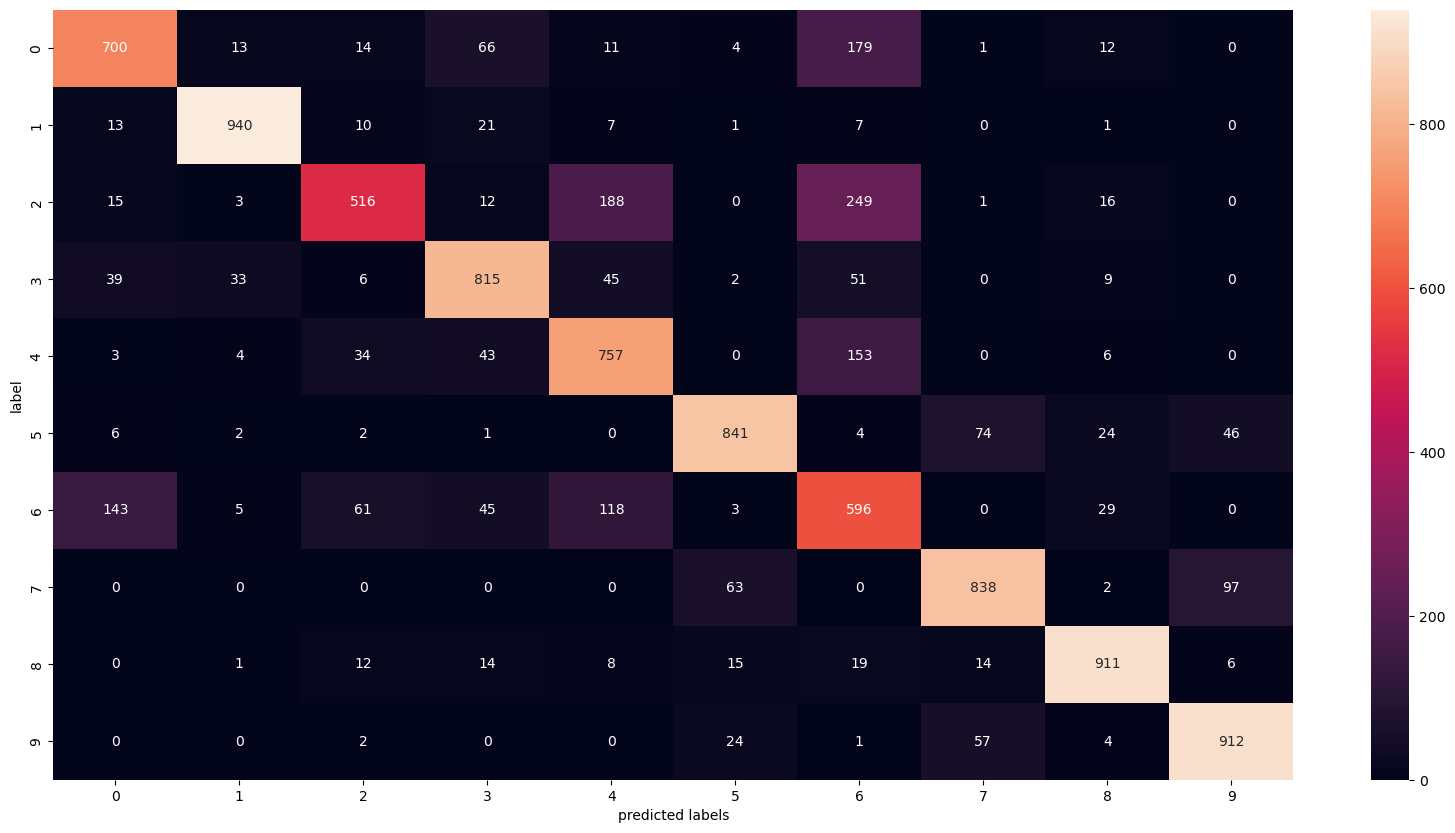

In [78]:
plt.figure(figsize = (20,10))
sns.heatmap(cm,annot = True,fmt='d')
plt.show()

In [128]:
def calculate_metrics(confusion_matrix):
    precision = np.zeros(confusion_matrix.shape[0])
    recall = np.zeros(confusion_matrix.shape[0])
    f1_score = np.zeros(confusion_matrix.shape[0])

    for i in range(confusion_matrix.shape[0]):
        true_positive = confusion_matrix[i, i]
        false_positive = np.sum(confusion_matrix[:, i]) - true_positive
        false_negative = np.sum(confusion_matrix[i, :]) - true_positive

        precision[i] = true_positive / (true_positive + false_positive)
        recall[i] = true_positive / (true_positive + false_negative)

        f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i])

    return precision, recall, f1_score

precision, recall, f1_score = calculate_metrics(con_mat)
macro_avg_f1_score = np.mean(f1_score)
print(f"\nMacro-average F1-Score: {macro_avg_f1_score}")


Macro-average F1-Score: 0.7832399193626072
